In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
x = np.linspace(-10,10,100)
y1 = norm.pdf(x,loc=-3,scale=2)
y2 = norm.pdf(x,loc=3,scale=2)
p1 = 0.5
p2 = 1-p1

z = y1*p1/(y1*p1+y2*p2)
xx = np.log((1-z)/z)

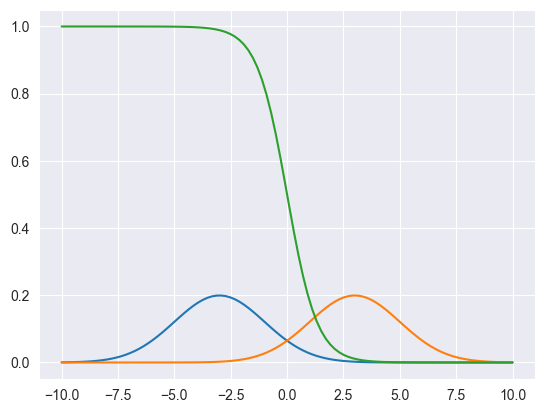

In [3]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,z)

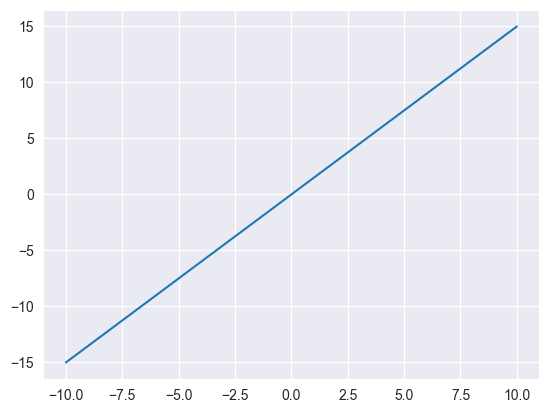

In [4]:
plt.plot(x,xx)

In [5]:
x1samp = norm.rvs(size=1000,loc=-3,scale=2)
x2samp = norm.rvs(size=1000,loc= 3,scale=2)

(array([  2.,  11.,  70., 149., 243., 253., 172.,  87.,  10.,   3.]),
 array([-3.94180952, -2.57129197, -1.20077443,  0.16974311,  1.54026066,
         2.9107782 ,  4.28129574,  5.65181329,  7.02233083,  8.39284837,
         9.76336592]),
 <BarContainer object of 10 artists>)

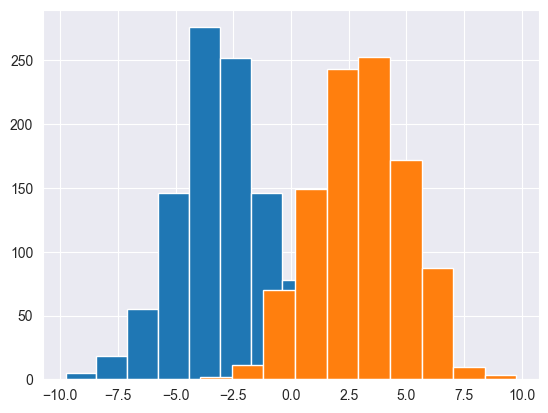

In [6]:
plt.hist(x1samp)
plt.hist(x2samp)

In [7]:
mu1 = np.mean(x1samp)
mu2 = np.mean(x2samp)
sigma2 = np.var(x1samp)
mu1, mu2, sigma2

(-3.0219962828461275, 3.006723165554574, 3.8251974574784273)

In [8]:
beta1 = -(mu1-mu2)/sigma2
beta0 = -(mu2**2 - mu1**2)/2/sigma2
(beta0, beta1)

(0.012035632183284871, 1.576054443049546)

In [9]:
df = pd.DataFrame({'x':np.append(x1samp,x2samp),'y':np.append(np.zeros(1000),np.ones(1000))})
df

,x,y
0,0.026032,0.0
1,-3.379215,0.0
2,-4.271782,0.0
3,-2.161417,0.0
4,-2.066417,0.0
...,...,...
1995,0.418429,1.0
1996,5.507645,1.0
1997,6.986262,1.0
1998,3.577085,1.0


In [10]:
df['bin'] = pd.cut(df['x'],bins=20)

In [11]:
df2 = df.groupby('bin').agg('mean')
df2

,x,y
bin,,
"(-9.793, -8.797]",-9.329447,0.000000
"(-8.797, -7.82]",-8.166522,0.000000
"(-7.82, -6.843]",-7.243771,0.000000
"(-6.843, -5.866]",-6.285144,0.000000
"(-5.866, -4.889]",-5.304164,0.000000
"(-4.889, -3.913]",-4.357232,0.006173
"(-3.913, -2.936]",-3.413600,0.000000
"(-2.936, -1.959]",-2.489251,0.015873
"(-1.959, -0.982]",-1.512853,0.122449


In [12]:
def sigmoid(beta0,beta1,x):
    return 1/(1+np.exp(-beta0 - beta1*x))

In [13]:
model = LogisticRegression(random_state=0)
model.fit(df.iloc[:,:1],df['y'])

LogisticRegression(random_state=0)

In [14]:
model.coef_, model.intercept_

(array([[1.51975925]]), array([0.04111971]))

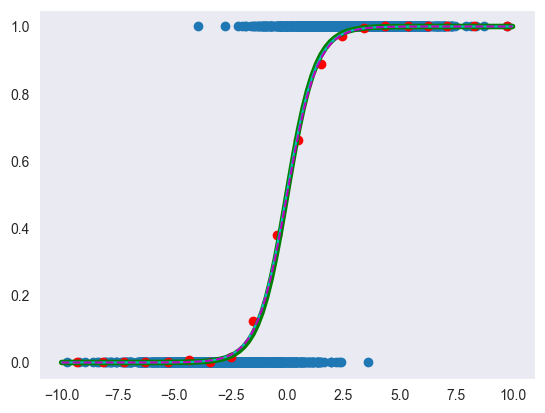

In [15]:
plt.scatter(df['x'],df['y'])
plt.plot(df2['x'],df2['y'],'ro')
plt.plot(x, sigmoid(beta0,beta1,x),'g',linewidth=4)
plt.plot(x, sigmoid(model.intercept_[0],model.coef_[0][0],x),'c')
plt.plot(x, sigmoid(0,6/4,x),'m--')
plt.grid()

In [16]:
beta0,beta1

(0.012035632183284871, 1.576054443049546)